In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
# Load the data
data = np.loadtxt('auto-mpg.csv', delimiter=',')
y = data[:,0]
x = data[:,1:8]
# Split into training and test+
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=891)

In [2]:
# Train model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
# Predict test set
y_pred = reg.predict(X_test)

Text(0, 0.5, 'Predicted values for y')

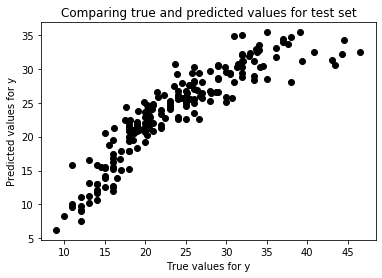

In [3]:
# Comparing true versus predicted values
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Root mean squared error = 3.4561
R-squared = 0.8069


In [5]:
# Display model parameters
import pandas as pd
print('Slope = ', reg.coef_)
print('Intercept = ', reg.intercept_)

### Step 4: Postprocessing
columns = ['Train error', 'Test error', 'Sum of Absolute Weights']
values1 = [ np.sqrt(mean_squared_error(y_train, y_pred_train)), 
           np.sqrt(mean_squared_error(y_test, y_pred)),
           np.absolute(reg.coef_).sum() + np.absolute(reg.intercept_)]
results = pd.DataFrame([values1], columns=columns, index=['MLR'])
results

Slope =  [-0.65834328  0.01405478 -0.0237873  -0.00567093 -0.05662719  0.72666556
  0.74193786]
Intercept =  -11.890123760266874


,Train error,Test error,Sum of Absolute Weights
MLR,3.210281,3.456058,14.117211


In [6]:
from sklearn import linear_model
# Train model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train,y_train)
# View coefficients
print(reg.coef_)
from sklearn.metrics import mean_squared_error
# Predict test set
y_pred = reg.predict(X_test)
print(mean_squared_error(y_test,y_pred))

[-0.65183737  0.0139174  -0.0236812  -0.0056743  -0.05646149  0.72650549
  0.73621476]
11.948494405035541


In [7]:
from sklearn import linear_model
import pandas as pd

ridge = linear_model.RidgeCV(alphas=[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

values6 = [ np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_).sum() + np.absolute(ridge.intercept_)]
print("Selected alpha = %.2f" % ridge.alpha_)
columns = ['Train error', 'Test error', 'Sum of Absolute Weights']
ridge_results = pd.DataFrame([values6], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])


Selected alpha = 1.40


,Train error,Test error,Sum of Absolute Weights
MLR,3.210281,3.456058,14.117211
RidgeCV,3.210307,3.457736,14.057690


In [8]:
from sklearn import linear_model

lasso = linear_model.LassoCV(cv=5, alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0, 1.2, 1.4])
lasso.fit(X_train, y_train.reshape(y_train.shape[0]))
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

values7 = [np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_).sum() + np.absolute(lasso.intercept_)]
print("Selected alpha = %.2f" % lasso.alpha_)

lasso_results = pd.DataFrame([values7], columns=columns, index=['LassoCV'])
pd.concat([results, ridge_results,lasso_results])

Selected alpha = 1.00


,Train error,Test error,Sum of Absolute Weights
MLR,3.210281,3.456058,14.117211
RidgeCV,3.210307,3.457736,14.057690
LassoCV,3.269057,3.594123,6.807612


Root mean squared error = 3.5373
R-squared = 0.7977


Text(0, 0.5, 'Predicted values for y')

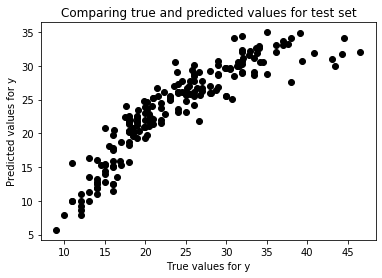

In [9]:
# Fit regression model with Kernel ridge
from sklearn.kernel_ridge import KernelRidge
reg = KernelRidge(alpha=1.0)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

Root mean squared error = 39.8066
R-squared = -24.6193


Text(0, 0.5, 'Predicted values for y')

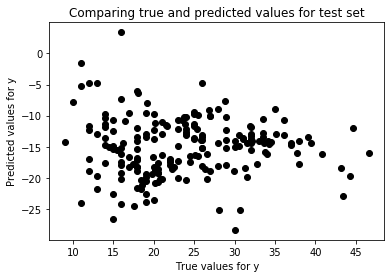

In [10]:
# Fit regression model with ANN
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

Root mean squared error = 4.6337
R-squared = 0.6529


Text(0, 0.5, 'Predicted values for y')

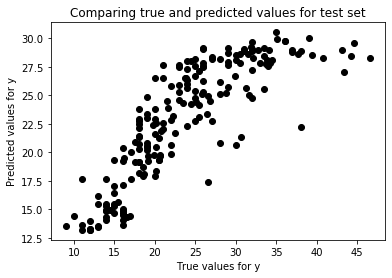

In [11]:
# Fit regression model with SVR
from sklearn.svm import SVR
reg = SVR(gamma='scale', C=1.0, epsilon=0.2)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

Root mean squared error = 3.5019
R-squared = 0.8017


Text(0, 0.5, 'Predicted values for y')

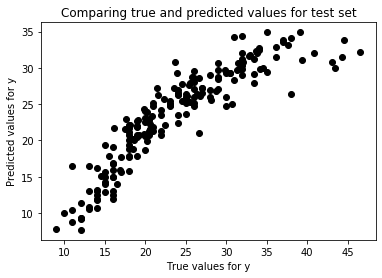

In [13]:
# Fit regression model with SVR linear kernel
from sklearn.svm import SVR
reg = SVR(kernel='linear', C=0.2, gamma='scale')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')